## Create CNN Model and Optimize it using Keras Tuner

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q keras
!pip install -q keras-tuner

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
print(tf.__version__)

2.5.0


In [5]:
fashion_mnist=keras.datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [7]:
train_images=train_images/255.0
test_images=test_images/255.0

In [8]:
train_images[0].shape

(28, 28)

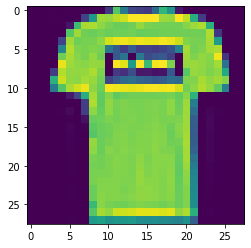

In [9]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(train_images[1])

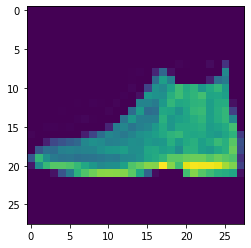

In [11]:
plt.imshow(test_images[0])

**Data pre-processing**
Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.
Example of color RGBA images of size (300,300,4)-4 colors are used in the last place 

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [12]:
train_labels[0]

9

In [13]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [14]:
train_images.shape

(60000, 28, 28, 1)

Our first 2 layers are Conv2D layers. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices.

The number of nodes in each layer can be adjusted to be higher or lower, depending on the size of the dataset. 

Kernel size is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix.

In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. ***Flatten*** serves as a connection between the convolution and dense layers.
‘Dense’ is the layer type we will use in for our output layer. Dense is a standard layer type that is used in many cases for neural networks.

We will have 10 nodes in our output layer, one for each possible outcome (0–9).
The activation is ‘softmax’. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

Compiling the model takes three parameters: optimizer, loss and metrics.
The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.
The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.

In [15]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [16]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [21]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output1',project_name="Mnist_Fashion1")

In [22]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 41s]
val_accuracy: 0.909166693687439

Best val_accuracy So Far: 0.9139999747276306
Total elapsed time: 00h 05m 29s
INFO:tensorflow:Oracle triggered exit


In [23]:
model=tuner_search.get_best_models(num_models=1)[0]

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 80)        800       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 48)        96048     
_________________________________________________________________
flatten (Flatten)            (None, 23232)             0         
_________________________________________________________________
dense (Dense)                (None, 80)                1858640   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 1,956,298
Trainable params: 1,956,298
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.1489 - accuracy: 0.9451 - val_loss: 0.2510 - val_accuracy: 0.9120
Epoch 5/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1120 - accuracy: 0.9578 - val_loss: 0.2780 - val_accuracy: 0.9090
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0836 - accuracy: 0.9693 - val_loss: 0.2987 - val_accuracy: 0.9108
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0617 - accuracy: 0.9774 - val_loss: 0.3949 - val_accuracy: 0.9058
Epoch 8/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0476 - accuracy: 0.9825 - val_loss: 0.3952 - val_accuracy: 0.9122
Epoch 9/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0358 - accuracy: 0.9867 - val_loss: 0.4364 - val_accuracy: 0.9122
Epoch 10/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0289 - accuracy: 0.9896 - val_loss: 0.5186 - val_a

In [30]:
test_images.shape

(10000, 28, 28, 1)

In [33]:
predictions = model.predict(test_images)

In [34]:
predictions.shape

(10000, 10)

In [49]:
predictions[0]

array([4.9487355e-16, 1.8307807e-18, 1.5405843e-18, 1.4669036e-19,
       2.6819663e-21, 4.0833790e-12, 4.2990350e-20, 5.4522161e-11,
       1.8256658e-21, 1.0000000e+00], dtype=float32)

In [51]:
predict_index = np.argmax(predictions[0])
print(predict_index)

9


In [52]:
test_labels[0]

9

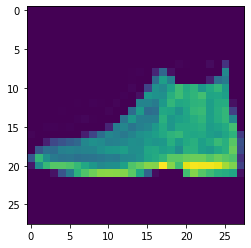

In [53]:
plt.imshow(np.squeeze(test_images[0]))